# Australia shark attacks project
### Analyzing data from shark attacks in australia and answering some questions.
   1. How many attacks by states? 
   2. Men or women suffer more attacks?
   3. What percentage of people surviving attacks?
   4. Harbor influence in attacks?
   5. What are the most attacking species?
 <img src='shark.png' width="200" height="200"><br>
<a href="https://www.sharkattackfile.net/index.htm" >DATASET</a>

In [1]:
#=======================  IMPORTING LIBRARIES   ==========================#
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager
%matplotlib inline
from collections import Counter
from geopy.geocoders import Nominatim
from folium import plugins
import plotly.express as px


#==============================   functions   ================================#

#importing coordinates with accident address

def listaloc(X): 
    loc = X.copy()
    lista = []
    for i in loc:
        location = geolocator.geocode(i)
        if location == None:
            pass
        else:
            # australia
            if -60 <= location.latitude <= 35 and 70 <= location.longitude <= 200:
                coor = [location.latitude, location.longitude]
                lista.append(coor)
            else:
                pass
    return lista

In [2]:
#import
df = pd.read_excel("dataframe.xls")
type(df)
#conect map
geolocator = Nominatim(user_agent="Shark")

# Data cleaning

In [3]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [4]:
#===================================   rename columns    ========================================#
df.rename(columns ={'Sex ':'Sex'},inplace=True)
df.rename(columns ={'Species ':'Species'},inplace=True)
df.rename(columns ={'Fatal (Y/N)':'Fatal'},inplace=True)

In [5]:
country = df['Country']
Counter(country).most_common(5)

[(nan, 19359),
 ('USA', 2310),
 ('AUSTRALIA', 1365),
 ('SOUTH AFRICA', 583),
 ('PAPUA NEW GUINEA', 134)]

In [6]:
#analyzing data from australia
df = df[df.Country == "AUSTRALIA"]

In [7]:
#Missing values
df.isnull().sum()

Case Number                  0
Date                         0
Year                         1
Type                         1
Country                      0
Area                        14
Location                    45
Activity                   126
Name                        19
Sex                        141
Age                        619
Injury                       6
Fatal                      114
Time                       743
Species                    559
Investigator or Source       2
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               1365
Unnamed: 23               1365
dtype: int64

In [8]:
print("Fatal =" ,dict(df['Fatal'].value_counts()))
print("Sex = ",dict(df['Sex'].value_counts()))
print("Area = ",dict(df['Area'].value_counts()))
print("Type = ",dict(df['Type'].value_counts()))

Fatal = {'N': 940, 'Y': 284, 'UNKNOWN': 21, ' N': 5, 'N ': 1}
Sex =  {'M': 1129, 'F': 93, 'M ': 1, 'N': 1}
Area =  {'New South Wales': 495, 'Queensland': 321, 'Western Australia': 193, 'South Australia': 104, 'Victoria': 90, 'Torres Strait': 70, 'Tasmania': 42, 'Northern Territory': 23, 'Westerm Australia': 3, 'Victoria ': 2, 'Torres Strait ': 2, 'Northern Territory ': 2, 'Territory of Cocos (Keeling) Islands': 1, 'Norfolk Island': 1, 'New South Wales ': 1, 'Queensland ': 1}
Type =  {'Unprovoked': 955, 'Provoked': 138, 'Watercraft': 122, 'Invalid': 120, 'Sea Disaster': 24, 'Questionable': 3, 'Unverified': 1, 'Boat': 1}


In [9]:
df['Year'].describe()

count    1364.000000
mean     1936.761730
std       222.364693
min         0.000000
25%      1930.000000
50%      1962.000000
75%      2005.000000
max      2019.000000
Name: Year, dtype: float64

In [10]:
#========================  removing missing values    ========================#
df.drop(['Unnamed: 22',
         'Unnamed: 23',
         'Case Number',
         'Name',
         'Investigator or Source',
         'pdf',
         'href formula',
         'href',
         'Case Number.1',
         'Case Number.2',
         'Injury',
         'original order',
         'Time',
         'Date'], axis=1 , inplace=True)
df.drop(df.index[6401:] , inplace=True)
#=========================================   Location    ===========================================#
df_loc = df["Location"].dropna()
df_loc = df_loc.map('{},Australia'.format)
df_list_loc = sorted(set(list(df_loc)))
#===================================    completing data    ======================================#
df["Sex"].fillna('UNKNOWN', inplace = True)
df['Fatal'].fillna('UNKNOWN', inplace = True)
df['Activity'].fillna('UNKNOWN', inplace = True)
df['Location'].fillna('UNKNOWN', inplace = True)
df['Area'].fillna('UNKNOWN', inplace = True)
df['Age'].fillna('UNKNOWN', inplace = True)
df['Year'].fillna('UNKNOWN' , inplace = True)
df['Type'].fillna('UNKNOWN', inplace = True)
#===================================   adjusting values    ========================================#
df = df.replace({'Sex':{'M ':'M','N':'M'}})
df = df.replace({'Year':{5:1936,0:1903, 'UNKNOWN':1936}})
df = df.replace({'Type':{'Invalid':'UNKNOWN',
                         'Boat':'Watercraft',
                         'Questionable':'UNKNOWN',
                         'Unverified':'UNKNOWN'}})
df = df.replace({'Fatal':{' N':'N','N ':'N'}})
df = df.replace({'Area':{'Westerm Australia':'Western Australia',
                     'Northern Territory ':'Northern Territory',
                     'Victoria ':'Victoria',
                     'Torres Strait ':'Torres Strait',
                     'New South Wales ':'New South Wales',
                     'Queensland ':'Queensland'}})
#======================================   reset index    ===========================================#
df = df.reset_index()
df.drop(['index'], axis=1 , inplace=True)

In [11]:
#missing values
df.isnull().sum()

Year          0
Type          0
Country       0
Area          0
Location      0
Activity      0
Sex           0
Age           0
Fatal         0
Species     559
dtype: int64

# Shark attacks in the world

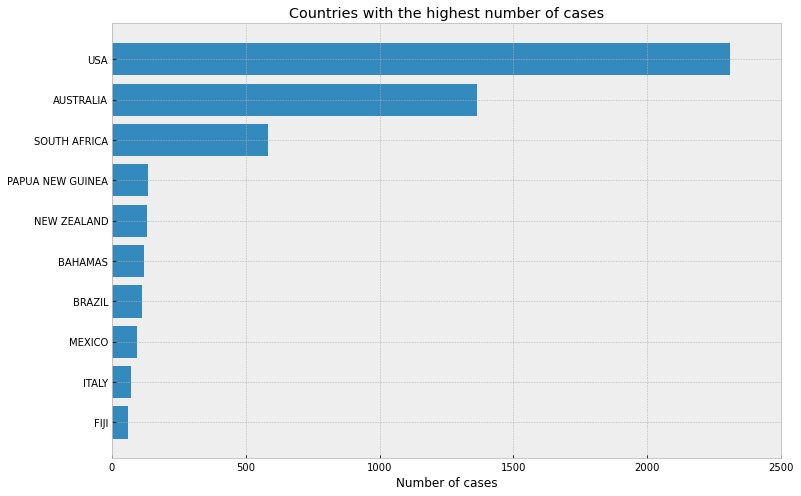

In [12]:
country = country.dropna()
top_country = dict(Counter(country).most_common(10))
y_count= (top_country.keys())
x_count= top_country.values()
y_pos_count = np.arange(len(y_count))
#=========================================================#

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [12, 8]
fig, ax = plt.subplots()
ax.barh(y_pos_count, x_count, align='center')
ax.set_yticks(y_pos_count)
ax.set_yticklabels(y_count)
ax.invert_yaxis()  
ax.set_xlabel('Number of cases')
ax.set(xlim=[0, 2500])
ax.set_title('Countries with the highest number of cases')
plt.show()

 <font size="6">
    Now let's start analyzing the cases in australia
 </font>

# How many attacks by states?

In [13]:
area = df['Area']
area = dict(Counter(area).most_common(10))
del area['UNKNOWN']
NSW = [-31.840233, 145.612793]
QLD = [-23.0 ,143.0]
WA = [-25.042261, 117.793221]
SA = [-30.000233, 136.209152]
VIC = [-37.020100,144.964600]
TS = [-9.874829834 ,142.587664316]
TAS =[-42.0, 147.0]
NT = [ -19.491411, 132.550964]
TOC = [-12.1709,  96.8417]

In [14]:
print(area)

{'New South Wales': 496, 'Queensland': 322, 'Western Australia': 196, 'South Australia': 104, 'Victoria': 92, 'Torres Strait': 72, 'Tasmania': 42, 'Northern Territory': 25, 'Territory of Cocos (Keeling) Islands': 1}


In [15]:
color="#2F4F4F"
m = folium.Map(location=[-25.27,133.77], #location australia
                  tiles='openstreetmap',
                  zoom_start=3.5,
                  min_zoom = 3.5,)
folium.CircleMarker(
    location=NSW,
    radius=50,
    popup="New South Wales:<b>496<b>",
    color=color,
    fill=True,
    fill_color=color,
).add_to(m)
folium.CircleMarker(
    location=QLD,
    radius=32,
    popup="Queensland:<b>322<b>",
    color=color,
    fill=True,
    fill_color=color,
).add_to(m)
folium.CircleMarker(
    location=WA,
    radius=20,
    popup="Western Australia:<b>196<b>",
    color=color,
    fill=True,
    fill_color=color,
).add_to(m)
folium.CircleMarker(
    location=SA,
    radius=11,
    popup="South Australia:<b>104<b>",
    color=color,
    fill=True,
    fill_color=color,
).add_to(m)
folium.CircleMarker(
    location=VIC,
    radius=9,
    popup="Victoria:<b>92<b>",
    color=color,
    fill=True,
    fill_color=color,
).add_to(m)
folium.CircleMarker(
    location=TS,
    radius=7,
    popup="Torres Strait:<b>72<b>",
    color=color,
    fill=True,
    fill_color=color,
).add_to(m)
folium.CircleMarker(
    location=TAS,
    radius=4,
    popup="Tasmania:<b>42<b>",
    color=color,
    fill=True,
    fill_color=color,
).add_to(m)
folium.CircleMarker(
    location=NT ,
    radius=7,
    popup="Northern Territory':<b>25<b>",
    color=color,
    fill=True,
    fill_color=color,
).add_to(m)
folium.CircleMarker(
    location=TOC,
    radius=3,
    popup="Territory of Cocos Islands:<b>1<b>",
    color=color,
    fill=True,
    fill_color=color,
).add_to(m)
m

In [16]:
m.save('map_states.html')

#### If you run this code you will see an html file like this
 <img src='map_states.png' width="800" height="800">

# Men or women suffer more attacks?
   - as you can see men are more attacked

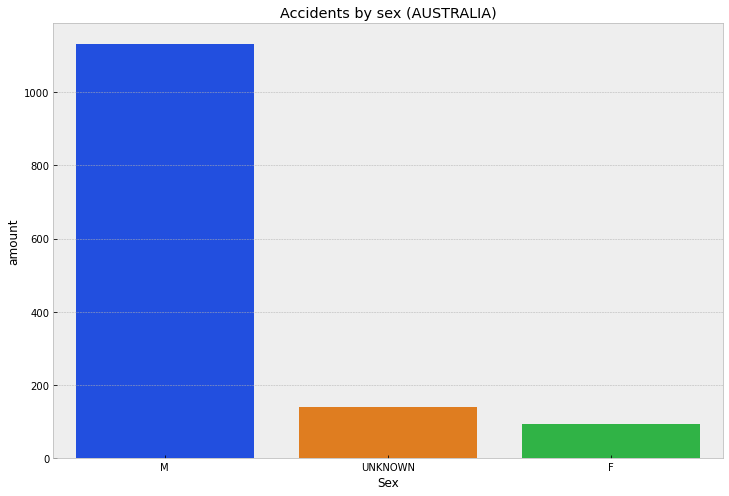

In [17]:
#============================   accidents / sex =================================#
sex = df['Sex']
sex = dict(sex.value_counts())
Sexo = list(sex.keys())
Quant = list(sex.values())
ax=sns.barplot(x=Sexo, y=Quant, palette="bright",).set(xlabel='Sex', ylabel='amount', 
                                                      title="Accidents by sex (AUSTRALIA)")

# What percentage of people surviving attacks?<br>
 <font size="5">
 70.4% of people who were attacked survive
</font>

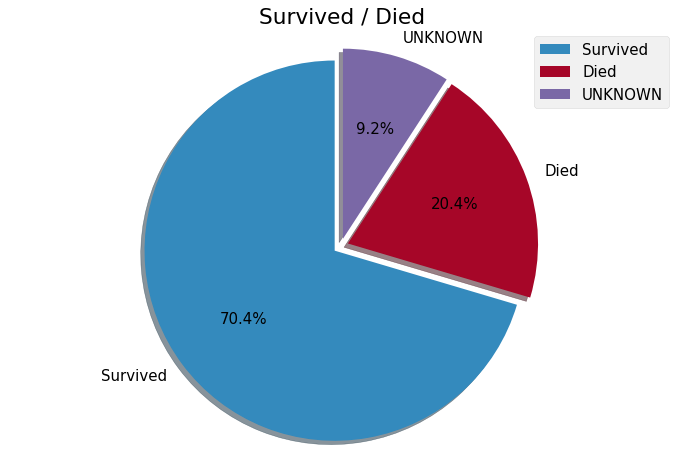

In [18]:
#============================  Survived / Died ================================#
fatal = df['Fatal']
fatal = dict(fatal.value_counts())
Fatal = list(fatal.keys())
Fatal[0]= "Survived"
Fatal[1]= "Died"
Quant_fatal = list(fatal.values())
Porcentagem = []
explode = (0.04,0.04,0.04)
for i in Quant_fatal:
    Porcentagem.append(int(i * 100/df['Fatal'].count()))
    
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 15
fig1, ax1 = plt.subplots()
ax1.pie(Porcentagem, explode=explode, labels=Fatal, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title('Survived / Died')
plt.axis('equal')
plt.legend(loc='upper right')

# Harbor influence in attacks?
    we can see on this map : 
   - Location of the top 5 Australian ports according to this site
   https://www.icontainers.com/us/2020/01/20/top-10-ports-australia/
   - Location of shark attacks in australia

In [19]:
#lista = listaloc(df_list_loc) extract coordinates

In [20]:
#np.savetxt("list_coor_australia.csv", lista , delimiter =",",fmt ='% s') save coordinates

In [21]:
mapa = folium.Map(location=[-25.27,133.77], #location australia
                 tiles='Stamen Terrain',
                  zoom_start=3.5,
                 min_zoom = 3.5)

In [22]:
lista2 = pd.read_csv("list_coor_australia.csv")

In [23]:
brisbane = [ -27.380726,153.164001]
sydney = [  -33.865143,151.209900]
fremantle = [-32.056946,115.743889]
melbourne = [-37.840935 , 144.946457]
hedland = [-20.31215, 118.61059]

In [24]:
mapa.add_child(plugins.HeatMap(lista2))
folium.Marker(brisbane,
              popup='Port of Brisbane',
              icon=folium.Icon(color='black',icon='ship', prefix='fa')
             ).add_to(mapa)
folium.Marker(sydney,
              popup='Port of Sydney',
              icon=folium.Icon(color='black',icon='ship', prefix='fa')
             ).add_to(mapa)
folium.Marker(fremantle,
              popup='Port of Fremantle',
              icon=folium.Icon(color='black',icon='ship', prefix='fa')
             ).add_to(mapa)
folium.Marker(melbourne,
              popup=' Port of Melbourne',
              icon=folium.Icon(color='black',icon='ship', prefix='fa')
             ).add_to(mapa)
folium.Marker(hedland,
              popup='Port of Hedland',
              icon=folium.Icon(color='black',icon='ship', prefix='fa')
             ).add_to(mapa)
mapa

In [25]:
mapa.save('map_harbors.html')

## If you run this code you will see an html file like this
 <img src='map_harbors.png' width="800" height="800"><br>
 
 
 
 <font size="4">
There is a significant correlation between the number of attacks and the number of harbors<br>
The sharks usually follow the ships.
</font>


# What are the most attacking species?

In [26]:
sharkc = df.groupby(['Species'],as_index=False).size()
sharkc = sharkc.sort_values(by=['size'], ascending=False)
sharkc = sharkc[0:4]

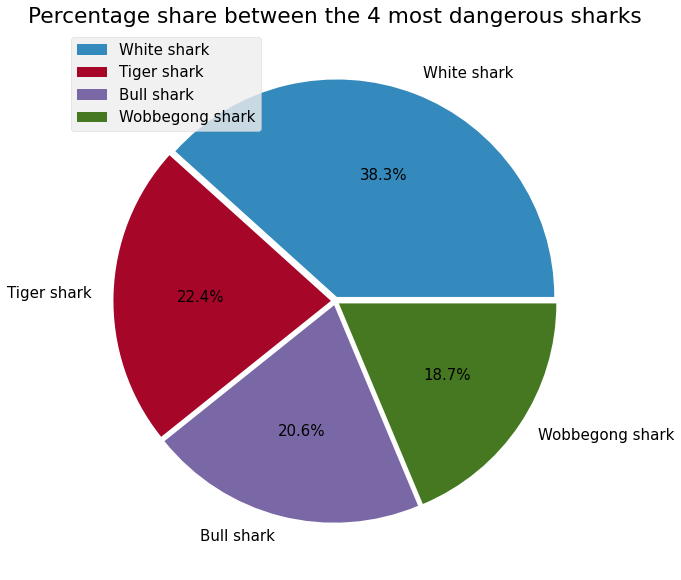

In [27]:
mlabels=['White shark','Tiger shark','Bull shark','Wobbegong shark']
plt.pie(sharkc['size'],labels=mlabels,explode = (0.02,0.02,0.02,0.02),autopct='%1.1f%%')
plt.title('Percentage share between the 4 most dangerous sharks')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.legend(loc=2)


# Have the attacks increased over the years?

<font size=4>The graph shows attacks since 1950, as we can see attacks have increased over the years</font>

Text(0.5, 1.0, 'Attacks per year')

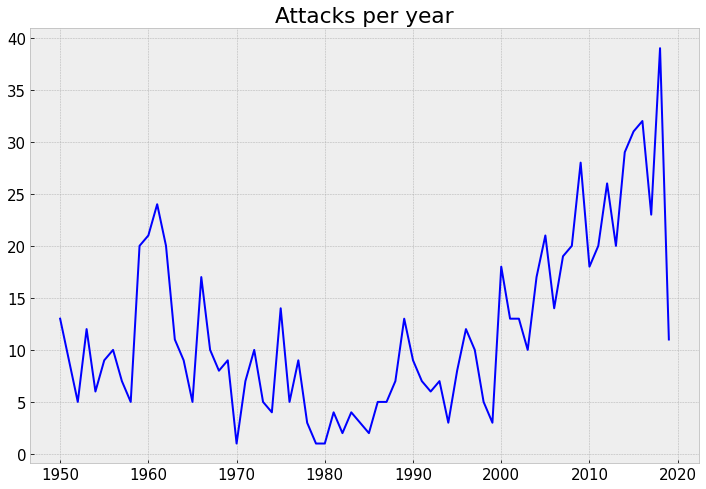

In [28]:
year = dict(df['Year'].value_counts())
year = dict(sorted(year.items()))
year_cop=dict(year)
type(year_cop)
for x, y in year.items():
    if x<1950:
        del year_cop[x]
    else:
        pass
ax1=plt.plot(year_cop.keys(), year_cop.values(), 'b-')
plt.title('Attacks per year')